## Imports and load data

In [80]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import random
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [6]:
random.seed(11)

In [7]:
df = pd.read_csv('Spotify_Youtube.csv')

## Question
Do hit songs have similar characteristics?

## Add a top 10% column

In [9]:
def top_10_percent(streams):
    threshold = df['Stream'].quantile(0.9)
    return 1 if streams >= threshold else 0

In [10]:
df['top_10_percent'] = df.Stream.apply(top_10_percent)

In [11]:
df[df['top_10_percent'] == 1].Stream.mean()

723110075.4148884

In [12]:
df[df['top_10_percent'] == 0].Stream.mean()

70672521.47255476

In [13]:
df.Duration_ms

0        222640.0
1        200173.0
2        215150.0
3        233867.0
4        340920.0
           ...   
20713     94667.0
20714    150857.0
20715    136842.0
20716    108387.0
20717    181500.0
Name: Duration_ms, Length: 20718, dtype: float64

In [14]:
df.loc[:,['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Stream']]

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Stream
0,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,1.040235e+09
1,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,3.100837e+08
2,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,6.306347e+07
3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,4.346636e+08
4,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...
20713,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,9.227144e+06
20714,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,1.089818e+07
20715,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,6.226110e+06
20716,0.417,0.767,9.0,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,6.873961e+06


In [15]:
df['converted_album_type'] = df.Album_type.apply(lambda x: 1 if x.lower()=='album' else 0)

## Preprocessing data

In [16]:
X = df.loc[:,['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']]
y = df.loc[:, ['top_10_percent']]


In [17]:
Xvalues = X.values

In [20]:
from sklearn.impute import SimpleImputer
pipe0 = Pipeline([
    ('fillna',SimpleImputer(strategy='constant',fill_value=1)),
    ('scale',StandardScaler()),
    ('pca', PCA(n_components=2,random_state=42)),    
])

In [25]:
pipe1 = Pipeline ([
    ('preproscessing', pipe0),
    ('kmeans', KMeans(n_clusters=2,init='k-means++',random_state=42))
])

In [26]:
Xformed = pipe0.fit_transform(Xvalues)
Xformed

array([[-1.81132142,  0.14047522],
       [-1.07237855, -0.92198264],
       [-1.41749195,  0.33623327],
       ...,
       [-0.86293798,  1.98420529],
       [-0.69568702,  0.17510431],
       [ 0.85507148,  2.57091067]])

## KMeans

/Users/cameronmoy/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/cameronmoy/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.513887142955676


/Users/cameronmoy/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/cameronmoy/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : 0.34623350199150094


/Users/cameronmoy/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/cameronmoy/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4 The average silhouette_score is : 0.37899792063705184


/Users/cameronmoy/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/cameronmoy/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5 The average silhouette_score is : 0.3362278342596639


/Users/cameronmoy/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/cameronmoy/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6 The average silhouette_score is : 0.33724741137621517


/Users/cameronmoy/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/cameronmoy/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7 The average silhouette_score is : 0.3278566643336183


/Users/cameronmoy/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/cameronmoy/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 8 The average silhouette_score is : 0.33163334995216676


/Users/cameronmoy/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/cameronmoy/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 9 The average silhouette_score is : 0.32995364118436077


/Users/cameronmoy/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/cameronmoy/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 10 The average silhouette_score is : 0.32850313706499906
Optimal # clusters: 2


/Users/cameronmoy/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/cameronmoy/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


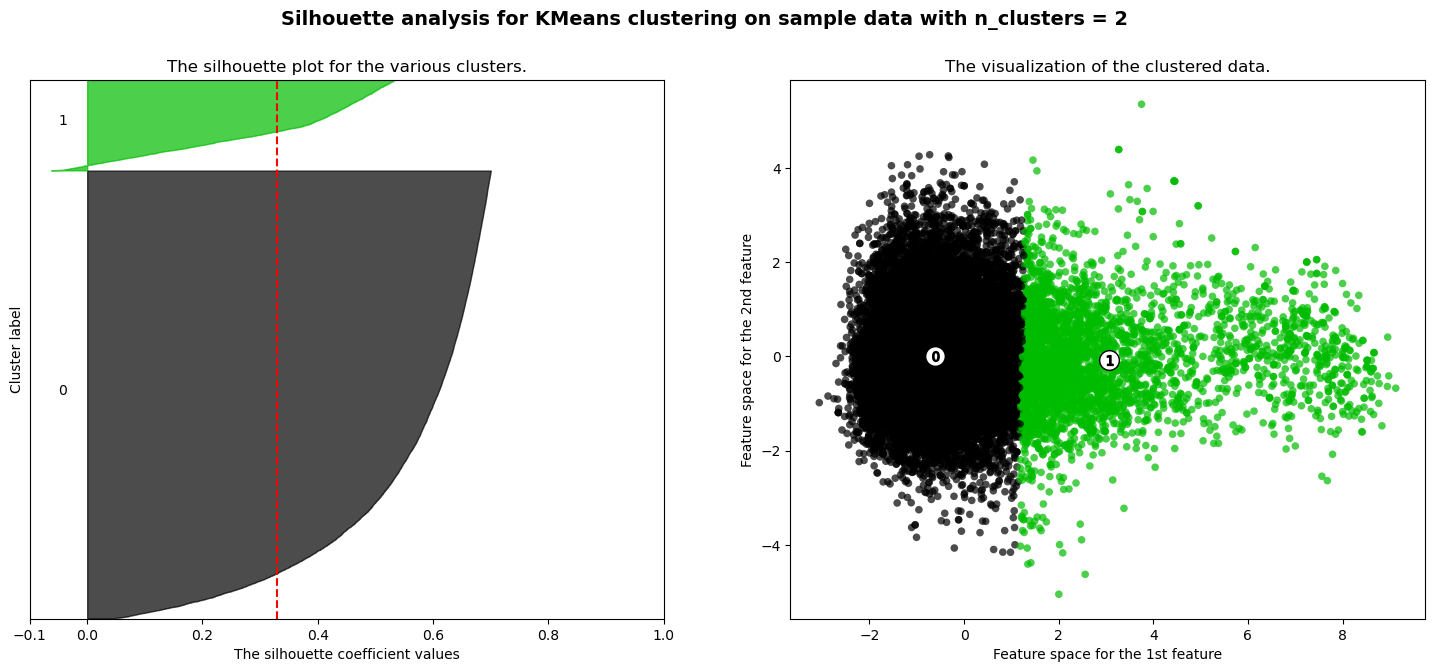

In [88]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm # colormaps
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
label_points = False
optimal = (range_n_clusters[0], 0)
for n_clusters in range_n_clusters:
    pipe1.named_steps.kmeans.set_params(n_clusters=n_clusters,random_state=42)
    clusterer = pipe1.named_steps.kmeans
    cluster_labels = pipe1.fit_predict(X)
    cluster_labels = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(Xformed)
    silhouette_avg = silhouette_score(Xformed, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    if silhouette_avg > optimal[1]:
        optimal = n_clusters, silhouette_avg

print("Optimal # clusters: " + str(optimal[0]))

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm # colormaps
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

ax1.set_xlim([-0.1, 1])

ax1.set_ylim([0, len(Xformed) + (optimal[0] + 1) * 10])

pipe1.named_steps.kmeans.set_params(n_clusters=optimal[0],random_state=42)
clusterer = pipe1.named_steps.kmeans
cluster_labels = pipe1.fit_predict(X)
cluster_labels = KMeans(n_clusters=optimal[0], random_state=42).fit_predict(Xformed)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(Xformed, cluster_labels)

y_lower = 10
for i in range(optimal[0]):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / optimal[0])
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / optimal[0])
ax2.scatter(Xformed[:, 0], Xformed[:, 1], marker='o', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

if label_points:
    for i,v in enumerate(Xformed):
        ax2.text(v[0],v[1],y.iloc[i][0],alpha=0.4)


# Labeling the clusters
centers = clusterer.cluster_centers_
#print(centers)
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % optimal[0]),
                fontsize=14, fontweight='bold')
plt.savefig('silhouette%02d.pdf' % optimal[0])
plt.show()

## Predictive modeling

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [53]:
X_train

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
15054,0.708,0.560,9.0,-7.132,0.1290,0.066800,0.000000,0.1110,0.411,163.043
10959,0.671,0.531,8.0,-5.551,0.0467,0.030700,0.000000,0.3650,0.280,140.013
14770,0.689,0.556,10.0,-4.776,0.0305,0.025400,0.000000,0.0942,0.795,132.851
12866,0.804,0.680,11.0,-6.884,0.3200,0.389000,0.000000,0.0652,0.755,145.523
6108,0.685,0.763,1.0,-4.842,0.0367,0.007120,0.000061,0.3600,0.658,141.969
...,...,...,...,...,...,...,...,...,...,...
17677,0.954,0.696,10.0,-7.117,0.2040,0.005760,0.000498,0.0754,0.432,100.036
4023,0.605,0.897,7.0,-6.080,0.0384,0.000414,0.000753,0.0666,0.709,130.053
7259,0.732,0.801,6.0,-6.009,0.0363,0.091100,0.000727,0.0459,0.275,124.975
3775,0.768,0.864,11.0,-6.145,0.0324,0.101000,0.000000,0.1620,0.891,110.008


In [54]:
num_pipe = Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])

In [57]:
nums = X_train.select_dtypes(exclude=['object']).columns
ct = ColumnTransformer([('num', num_pipe, nums)])

In [59]:
transformed_features = ct.fit_transform(X_train)

In [62]:
clf = LogisticRegression()
clf.fit(transformed_features, y_train)
clf.score(transformed_features, y_train)

/Users/cameronmoy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.902859901049837

In [73]:
accuracies = []
clfs = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), SVC(), AdaBoostClassifier(), GradientBoostingClassifier()]
for clf in clfs:
    print(clf.__class__.__name__, cross_val_score(clf, transformed_features, y_train.to_numpy()[:,0], cv=5).mean())
    accuracies.append(cross_val_score(clf, transformed_features, y_train.to_numpy()[:,0], cv=5).mean())

LogisticRegression 0.9028598996350781
DecisionTreeClassifier 0.8378179322422994
RandomForestClassifier 0.9180041161815453
SVC 0.9028598996350781
AdaBoostClassifier 0.9025582040996148
GradientBoostingClassifier 0.9027392177798653


In [74]:
vc = VotingClassifier([('lr', LogisticRegression()), ('dt', DecisionTreeClassifier()), ('rf', RandomForestClassifier()), ('svc', SVC()), ('ada', AdaBoostClassifier()), ('gb', GradientBoostingClassifier())],
                     weights=[5, 1, 10, 5, 5, 6])
cross_val_score(vc, transformed_features, y_train.to_numpy()[:,0], cv=5).mean()

0.9028598996350781

## Summary Stats

In [81]:
top = df[df.top_10_percent == 1].loc[:,['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Stream']].describe().reset_index()

In [82]:
not_top = df[df.top_10_percent == 0].loc[:,['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Stream']].describe().reset_index()

In [83]:
top

,index,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Stream
0,count,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2.015000e+03
1,mean,0.654848,0.661409,5.217866,-6.352386,0.092940,0.204281,0.013655,0.174024,0.521417,120.365539,7.231101e+08
2,std,0.148002,0.175117,3.658414,2.734984,0.088163,0.233392,0.081312,0.137543,0.228797,28.756358,3.996932e+08
3,min,0.000000,0.003420,0.000000,-28.460000,0.000000,0.000015,0.000000,0.021000,0.000000,0.000000,3.473446e+08
4,25%,0.563000,0.548000,2.000000,-7.490000,0.037800,0.026700,0.000000,0.090500,0.342000,97.795500,4.409987e+08
5,50%,0.671000,0.681000,5.000000,-5.830000,0.055400,0.111000,0.000000,0.117000,0.526000,118.881000,5.781221e+08
6,75%,0.759000,0.792000,8.000000,-4.566500,0.106000,0.301000,0.000070,0.212000,0.706000,138.002500,8.821007e+08
7,max,0.970000,0.989000,11.000000,-1.190000,0.592000,0.991000,1.000000,0.886000,0.979000,205.863000,3.386520e+09


In [92]:
df.Stream.median()

49682981.5